In [6]:
import pandas as pd
# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
df = pd.read_csv(train_file)

In [7]:
import pandas as pd

# Example class distribution (replace with your actual dataset)
# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)


df = pd.DataFrame(df_train)

print("Class distribution before undersampling:")
print(df['label'].value_counts())

Class distribution before undersampling:
label
0    19126
1     2650
Name: count, dtype: int64


In [8]:
def perform_undersampling(df, target_column, ratio=1.0, random_state=42):
    # Identify minority and majority classes
    minority_class = df[df[target_column] == '1']
    majority_class = df[df[target_column] == '0']

    # Determine the number of samples to keep from majority class
    n_minority = len(minority_class)
    n_majority_to_keep = int(n_minority * ratio)

    # Undersample majority class randomly
    majority_sampled = majority_class.sample(n=n_majority_to_keep, random_state=random_state)

    # Combine minority class and sampled majority class
    undersampled_df = pd.concat([minority_class, majority_sampled])

    # Shuffle the dataset
    undersampled_df = undersampled_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return undersampled_df

# Assuming 'label' is the name of the target column in your dataset
target_column = 'label'

# Perform undersampling
df_resampled = perform_undersampling(df, target_column)

# Print class distribution after undersampling
print("\nClass distribution after undersampling:")
print(df_resampled[target_column].value_counts())


Class distribution after undersampling:
Series([], Name: count, dtype: int64)


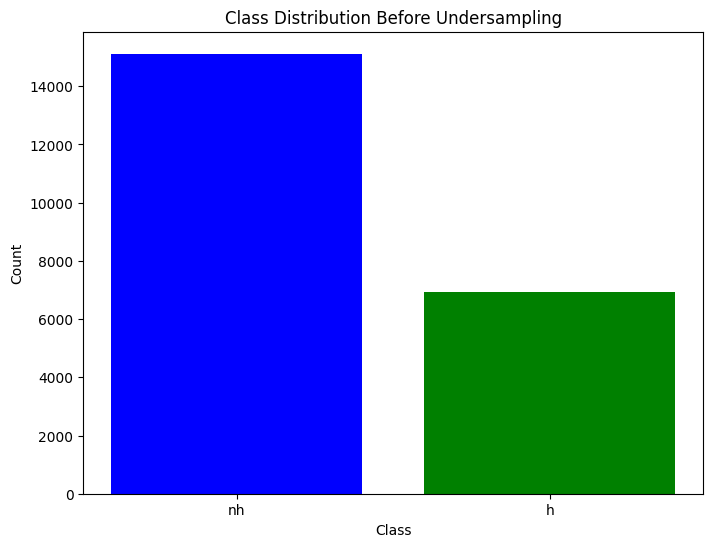


Class distribution after undersampling:
label
nh    6920
h     6920
Name: count, dtype: int64


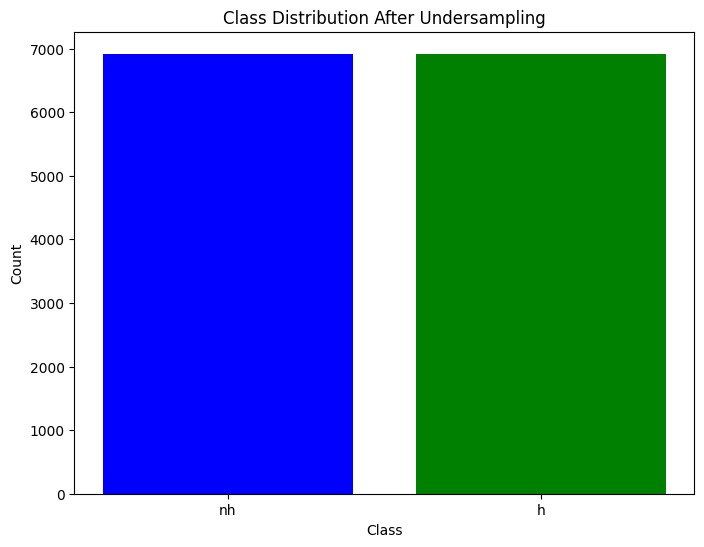

In [4]:
import matplotlib.pyplot as plt
# Plot class distribution before undersampling
plt.figure(figsize=(8, 6))
plt.bar(df[target_column].value_counts().index, df[target_column].value_counts().values, color=['blue', 'green'])
plt.title('Class Distribution Before Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Perform undersampling
df_resampled = perform_undersampling(df, target_column)

# Print class distribution after undersampling
print("\nClass distribution after undersampling:")
print(df_resampled[target_column].value_counts())

# Plot class distribution after undersampling
plt.figure(figsize=(8, 6))
plt.bar(df_resampled[target_column].value_counts().index, df_resampled[target_column].value_counts().values, color=['blue', 'green'])
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [5]:
import pandas as pd

# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

df = pd.DataFrame(df_train)

print("Class distribution before oversampling:")
print(df['label'].value_counts())

Class distribution before oversampling:
label
nh    15116
h      6920
Name: count, dtype: int64


In [6]:
def perform_oversampling(df, target_column, ratio=1.0, random_state=42):
    # Identify minority and majority classes
    minority_class = df[df[target_column] == 'h']
    majority_class = df[df[target_column] == 'nh']

    # Determine the number of samples to add to minority class
    n_majority = len(majority_class)
    n_minority_to_add = int(n_majority * ratio) - len(minority_class)

    # Oversample minority class with replacement
    minority_sampled = minority_class.sample(n=n_minority_to_add, replace=True, random_state=random_state)

    # Combine minority class and original majority class
    oversampled_df = pd.concat([majority_class, minority_sampled, minority_class])

    # Shuffle the dataset
    oversampled_df = oversampled_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return oversampled_df

# Assuming 'label' is the name of the target column in your dataset
target_column = 'label'

# Perform oversampling
df_resampled = perform_oversampling(df, target_column)

# Print class distribution after oversampling
print("\nClass distribution after oversampling:")
print(df_resampled[target_column].value_counts())



Class distribution after oversampling:
label
nh    15116
h     15116
Name: count, dtype: int64



Class distribution after oversampling:
label
nh    15116
h     15116
Name: count, dtype: int64


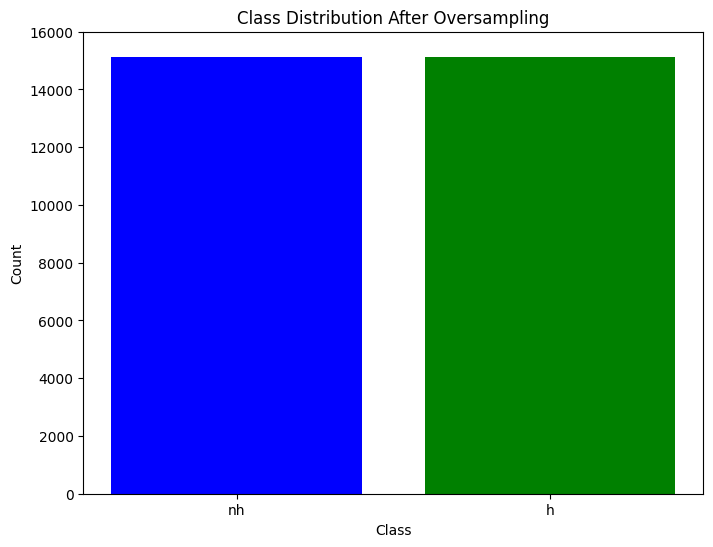

In [7]:
import matplotlib.pyplot as plt

# Perform oversampling
df_resampled = perform_oversampling(df, target_column)

# Print class distribution after oversampling
print("\nClass distribution after oversampling:")
print(df_resampled[target_column].value_counts())

# Plot class distribution after oversampling
plt.figure(figsize=(8, 6))
plt.bar(df_resampled[target_column].value_counts().index, df_resampled[target_column].value_counts().values, color=['blue', 'green'])
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.ylim(0, 16000)
plt.show()